## Visualizing hourly data

This notebooks explores an intuitive way to visualize 24 hour data using matplotlib. 

### Importing data

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
data = pd.read_csv(r"..\hourly_data.csv")
data


hour  value
0      0      6
1      1     34
2      2     43
3      3     45
4      4     53
5      5    234
6      6    328
7      7    339
8      8    345
9      9    345
10    10    345
11    11    345
12    12    427
13    13    484
14    14    489
15    15    651
16    16    684
17    17    860
18    18    862
19    19    960
20    20   1970
21    21   5472
22    22   6247
23    23   6385

### Scaling the data to limit the values (optional)
This step is done to limit the values to a specific range to avoid spurious visualization caused by large values. This is not required when % share of hourly values is plotted (this case)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()
data[["scaled_value"]] = scaler.fit_transform(data[["value"]])
data.head()

hour  value  scaled_value
0     0      6      0.000000
1     1     34      0.004389
2     2     43      0.005800
3     3     45      0.006114
4     4     53      0.007368

### Creating angles for each hour label and values
The visualization will represent the values for each hour on 24 hour clock dial. So setting the angle for each hour before doing the visualization. 

In [11]:
#Sorting values basis hour before creating angles
data = data.sort_values(by = 'hour', ascending=True)
# Creating predefined angle for each hour of 24 hour set
# This can also be achieved with linspace, but not using to reduce the number of logics used to improve performance 
# for the cases when the visualization is used in any dashboard requiring frequent rendering.
data['theta'] = pd.Series([90,75,60,45,30,15,0,-15,-30,-45,-60,-75,-90,-105,240,225,210,195,180,165,150,135,120,105])

### Creating % share of values

In [21]:
data['share'] = data['value'].apply( lambda x: x/sum(data['value']))

### Creating the dial and colours to be user on the dial

In [14]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Circle, Rectangle
# Initial Conditions  - setting the radius of the clock dial
r1 = 7
r2 = 5
N = 24  # for creating a set of 24 colours on dial to indicate 24 hours
mid = (r1+r2)/2
height = r2 - r1
width = np.deg2rad(15)
radii = 10 * np.random.rand(N)

# Creating arrays of Ordered Colors to use in the dial
colors = plt.cm.viridis(data['hour'].iloc[::-1] / 25)
colors2 = plt.cm.viridis(data['hour'].iloc[::-1] / 8)
# colors3 = plt.cm.Blues(data['hour'].iloc[::-1] * 10)
colors3 = plt.cm.Blues(data['hour'] * 10)

# #Random Colors (If randow colour intensities are needed regardless the hour value)
# colors = plt.cm.viridis(radii * 10.)
# colors2 = plt.cm.viridis(radii * 12.)
# colors3 = plt.cm.Blues(radii * 12.5)


### Creating the dial

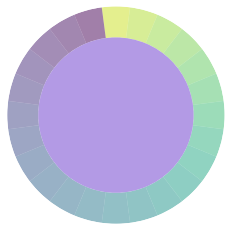

In [15]:

#Creation of plot
ax = plt.subplot(projection='polar')

#Clock creation
ax.bar(np.deg2rad(data['theta']), height, width=width, bottom=r1, color=colors, alpha=0.5)  # clock hours back
ax.bar(0, r1-2, width=np.deg2rad(360), bottom=0.0, color='#9370DB', alpha=0.7)   # Mid dial
ax.axis("off")
plt.show()

### Plotting background for clock hours and values

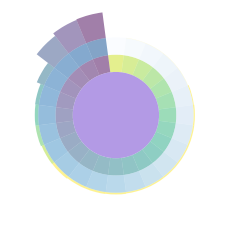

In [18]:
#Creation of plot
ax = plt.subplot(projection='polar')

#Clock creation
ax.bar(np.deg2rad(data['theta']), height, width=width, bottom=r1, color=colors, alpha=0.5)  # clock hours back
ax.bar(0, r1-2, width=np.deg2rad(360), bottom=0.0, color='#9370DB', alpha=0.7)   # Mid dial

# Adding hour labels and values for each hour
ax.bar(np.deg2rad(data['theta']), (data["scaled_value"]*3), width=width, bottom=9, color=colors2, alpha=0.5)  # clock values
ax.bar(np.deg2rad(data['theta']), height, width=width, bottom=9, color=colors3, alpha=0.5)  # clock percentages back
ax.axis("off")
plt.show()

### Adding an indicator for location of maximum value

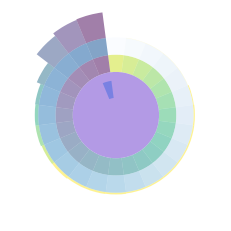

In [19]:
#Creation of plot
ax = plt.subplot(projection='polar')

#Clock creation
ax.bar(np.deg2rad(data['theta']), height, width=width, bottom=r1, color=colors, alpha=0.5)  # clock hours back
ax.bar(0, r1-2, width=np.deg2rad(360), bottom=0.0, color='#9370DB', alpha=0.7)   # Mid dial

# Adding hour labels and values for each hour
ax.bar(np.deg2rad(data['theta']), (data["scaled_value"]*3), width=width, bottom=9, color=colors2, alpha=0.5)  # clock values
ax.bar(np.deg2rad(data['theta']), height, width=width, bottom=9, color=colors3, alpha=0.5)  # clock percentages back
ax.bar(np.deg2rad(data['theta'][(data['scaled_value'] == max(data['scaled_value']))]), height, width=width, bottom=4, color='#4169E1', alpha=0.5)  # clock percentages max


ax.axis("off")
plt.show()

### Adding numerical values on the dial

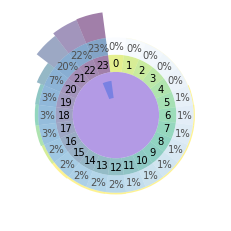

In [31]:
#Creation of plot
ax = plt.subplot(projection='polar')

#Clock creation
ax.bar(np.deg2rad(data['theta']), height, width=width, bottom=r1, color=colors, alpha=0.5)  # clock hours back
ax.bar(0, r1-2, width=np.deg2rad(360), bottom=0.0, color='#9370DB', alpha=0.7)   # Mid dial

# Adding hour labels and values for each hour
ax.bar(np.deg2rad(data['theta']), (data["scaled_value"]*3), width=width, bottom=9, color=colors2, alpha=0.5)  # clock values
ax.bar(np.deg2rad(data['theta']), height, width=width, bottom=9, color=colors3, alpha=0.5)  # clock percentages back
ax.bar(np.deg2rad(data['theta'][(data['scaled_value'] == max(data['scaled_value']))]), height, width=width, bottom=4, color='#4169E1', alpha=0.5)  # clock percentages max




#Numerical values
#Clock hours
for hour in range(0,24):
    plt.annotate(hour,xy=(np.deg2rad(data['theta'][hour]), mid),   ha="center", va="center", fontsize = 10) # Clock locations
    plt.annotate("{:.0%}".format(data['share'][hour]),xy=(np.deg2rad(data['theta'][hour]), mid+2),   ha="center", va="center", color='#505050', fontsize = 10) # Clock percentages
    

ax.axis("off")
plt.show()